In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\Home Loan Project\HMDA_OwnerOccupiedLoan_Demographics.csv", encoding = 'latin-1')

C:\Users\pavan\AppData\Local\Temp\ipykernel_6448\53480780.py:1: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\Home Loan Project\HMDA_OwnerOccupiedLoan_Demographics.csv", encoding = 'latin-1')


In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,68601,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,4272.0,2.790000,55800.0,99.970001,1609.0,2271.0,NaN
1,2017,63194,National Credit Union Administration,NCUA,5,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,5451.0,10.790000,56800.0,128.639999,1601.0,1814.0,NaN
2,2017,451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,3372.0,33.189999,97400.0,141.740005,592.0,1105.0,NaN
3,2017,41-1842999,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,12551.0,6.490000,89800.0,135.779999,3463.0,3782.0,NaN
4,2017,613307,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,3755.0,62.639999,73700.0,132.720001,623.0,742.0,NaN


## Data Inspection and Initial Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 78 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   as_of_year                      1048575 non-null  int64  
 1   respondent_id                   1048575 non-null  object 
 2   agency_name                     1048575 non-null  object 
 3   agency_abbr                     1048575 non-null  object 
 4   agency_code                     1048575 non-null  int64  
 5   loan_type_name                  1048575 non-null  object 
 6   loan_type                       1048575 non-null  int64  
 7   property_type_name              1048575 non-null  object 
 8   property_type                   1048575 non-null  int64  
 9   loan_purpose_name               1048575 non-null  object 
 10  loan_purpose                    1048575 non-null  int64  
 11  owner_occupancy_name            1048575 non-null  object 
 12  

In [6]:
null_counts = df.isnull().sum()
null_counts

as_of_year                              0
respondent_id                           0
agency_name                             0
agency_abbr                             0
agency_code                             0
                                   ...   
hud_median_family_income              658
tract_to_msamd_income                 658
number_of_owner_occupied_units        658
number_of_1_to_4_family_units         658
application_date_indicator        1048575
Length: 78, dtype: int64

# Dropping columns with all null values and columns with more than 10000 null values

In [7]:
columns_to_drop = null_counts[null_counts == len(df)]
df_filtered = df.drop(columns_to_drop.index, axis = 1)

In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 68 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   as_of_year                      1048575 non-null  int64  
 1   respondent_id                   1048575 non-null  object 
 2   agency_name                     1048575 non-null  object 
 3   agency_abbr                     1048575 non-null  object 
 4   agency_code                     1048575 non-null  int64  
 5   loan_type_name                  1048575 non-null  object 
 6   loan_type                       1048575 non-null  int64  
 7   property_type_name              1048575 non-null  object 
 8   property_type                   1048575 non-null  int64  
 9   loan_purpose_name               1048575 non-null  object 
 10  loan_purpose                    1048575 non-null  int64  
 11  owner_occupancy_name            1048575 non-null  object 
 12  

In [9]:
df_new = df_filtered

In [10]:
non_null_counts = df_new.count()
columns_to_drop1 = non_null_counts[non_null_counts < 10000].index

df_dropped = df_new.drop(columns = columns_to_drop1)

In [11]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 52 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   as_of_year                      1048575 non-null  int64  
 1   respondent_id                   1048575 non-null  object 
 2   agency_name                     1048575 non-null  object 
 3   agency_abbr                     1048575 non-null  object 
 4   agency_code                     1048575 non-null  int64  
 5   loan_type_name                  1048575 non-null  object 
 6   loan_type                       1048575 non-null  int64  
 7   property_type_name              1048575 non-null  object 
 8   property_type                   1048575 non-null  int64  
 9   loan_purpose_name               1048575 non-null  object 
 10  loan_purpose                    1048575 non-null  int64  
 11  owner_occupancy_name            1048575 non-null  object 
 12  

In [12]:
df_new = df_dropped

# Understanding string columns using value_counts

In [13]:
df_new["action_taken_name"].value_counts()

Loan originated    1048575
Name: action_taken_name, dtype: int64

In [14]:
df_new["loan_purpose_name"].value_counts()

Home purchase       625467
Refinancing         383733
Home improvement     39375
Name: loan_purpose_name, dtype: int64

In [15]:
df_new["applicant_sex_name"].value_counts()

Male                                                                                 655184
Female                                                                               301997
Information not provided by applicant in mail, Internet, or telephone application     90691
Not applicable                                                                          703
Name: applicant_sex_name, dtype: int64

In [16]:
male_percentage = 0.6
female_percentage = 0.3
not_applicable_percentage = 0.1

# Calculate the counts for replacement based on percentages
total_to_replace = df_new.loc[df['applicant_sex_name'] == 'Information not provided by applicant in mail, Internet, or telephone application'].shape[0]
male_count = int(total_to_replace * male_percentage)
female_count = int(total_to_replace * female_percentage)
not_applicable_count = total_to_replace - male_count - female_count

# Generate replacement values with randomized distribution
replacement_values = np.random.choice(['Male', 'Female', 'Not applicable'], total_to_replace, p=[male_percentage, female_percentage, not_applicable_percentage])

# Replace values in the original DataFrame
df_new.loc[df['applicant_sex_name'] == 'Information not provided by applicant in mail, Internet, or telephone application', 'applicant_sex_name'] = replacement_values


In [17]:
df_new["applicant_sex_name"].value_counts()

Male              709782
Female            329052
Not applicable      9741
Name: applicant_sex_name, dtype: int64

In [18]:
df_new['applicant_sex_name'] = df_new['applicant_sex_name'].replace('Not applicable', 'Non Binary')

In [19]:
df_new["applicant_sex_name"].value_counts()

Male          709782
Female        329052
Non Binary      9741
Name: applicant_sex_name, dtype: int64

In [20]:
df_new["applicant_race_name_1"].value_counts()

White                                                                                777937
Information not provided by applicant in mail, Internet, or telephone application    150460
Black or African American                                                             55354
Asian                                                                                 53443
American Indian or Alaska Native                                                       5965
Native Hawaiian or Other Pacific Islander                                              4649
Not applicable                                                                          767
Name: applicant_race_name_1, dtype: int64

In [21]:
df_new["applicant_ethnicity_name"].value_counts()

Not Hispanic or Latino                                                               808199
Information not provided by applicant in mail, Internet, or telephone application    140695
Hispanic or Latino                                                                    98618
Not applicable                                                                         1063
Name: applicant_ethnicity_name, dtype: int64

In [22]:
df_new["applicant_sex_name"].value_counts()

Male          709782
Female        329052
Non Binary      9741
Name: applicant_sex_name, dtype: int64

In [23]:
race_ethnicity = df_new.groupby('applicant_race_name_1')["applicant_ethnicity_name"].value_counts().unstack(fill_value=0)

In [24]:
print(race_ethnicity)


applicant_ethnicity_name                            Hispanic or Latino  \
applicant_race_name_1                                                    
American Indian or Alaska Native                                  1461   
Asian                                                              646   
Black or African American                                         1407   
Information not provided by applicant in mail, ...                8639   
Native Hawaiian or Other Pacific Islander                          731   
Not applicable                                                       0   
White                                                            85734   

applicant_ethnicity_name                            Information not provided by applicant in mail, Internet, or telephone application  \
applicant_race_name_1                                                                                                                   
American Indian or Alaska Native                           

In [25]:
columns_to_delete = ['agency_code','loan_type', 'property_type','property_type_name',
       "loan_purpose","owner_occupancy", "owner_occupancy_name", "preapproval", "preapproval_name", 'action_taken',
       'msamd', 'state_code','census_tract_number','applicant_ethnicity','co_applicant_ethnicity',
       'applicant_race_1','applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2','co_applicant_race_name_3', 'co_applicant_race_3',
       'co_applicant_race_name_4', 'co_applicant_race_4',
       'co_applicant_race_name_5', 'co_applicant_race_5', 'applicant_sex', 'co_applicant_sex_name', 'co_applicant_sex',
       'purchaser_type_name', 'purchaser_type',
       'denial_reason_name_1', 'denial_reason_1', 'denial_reason_name_2',
       'denial_reason_2', 'denial_reason_name_3', 'denial_reason_3',
       'rate_spread', 'hoepa_status_name', 'hoepa_status', 'lien_status_name',
       'lien_status', 'edit_status_name', 'edit_status', 'sequence_number',
       'population', 'minority_population','tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'application_date_indicator']

In [26]:
df_new.drop(df_new[df_new['applicant_ethnicity_name'] == 'Information not provided by applicant in mail, Internet, or telephone application'].index, inplace=True)


In [27]:
df_new.drop(df_new[df_new['applicant_race_name_1'] == 'Information not provided by applicant in mail, Internet, or telephone application'].index, inplace=True)


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885799 entries, 1 to 1048574
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   as_of_year                      885799 non-null  int64  
 1   respondent_id                   885799 non-null  object 
 2   agency_name                     885799 non-null  object 
 3   agency_abbr                     885799 non-null  object 
 4   agency_code                     885799 non-null  int64  
 5   loan_type_name                  885799 non-null  object 
 6   loan_type                       885799 non-null  int64  
 7   property_type_name              885799 non-null  object 
 8   property_type                   885799 non-null  int64  
 9   loan_purpose_name               885799 non-null  object 
 10  loan_purpose                    885799 non-null  int64  
 11  owner_occupancy_name            885799 non-null  object 
 12  owner_occupancy

In [29]:
df_new.drop_duplicates()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,hoepa_status_name,hoepa_status,lien_status_name,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
1,2017,63194,National Credit Union Administration,NCUA,5,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,Not a HOEPA loan,2,Secured by a first lien,1,5451.0,10.790000,56800.0,128.639999,1601.0,1814.0
5,2017,451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,Not a HOEPA loan,2,Secured by a first lien,1,6225.0,62.860001,45300.0,279.720001,1575.0,2041.0
8,2017,68490,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,Not a HOEPA loan,2,Secured by a first lien,1,5589.0,30.150000,64300.0,134.110001,1378.0,1780.0
9,2017,451965,Consumer Financial Protection Bureau,CFPB,9,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,Not a HOEPA loan,2,Secured by a first lien,1,4078.0,58.310001,102600.0,73.889999,1021.0,1463.0
11,2017,33-0975529,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,Not a HOEPA loan,2,Secured by a first lien,1,3524.0,10.530000,62600.0,103.230003,1274.0,1857.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2017,7056000000,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,Not a HOEPA loan,2,Secured by a first lien,1,4225.0,82.440002,75200.0,56.099998,493.0,1151.0
1048571,2017,7197000003,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,Not a HOEPA loan,2,Secured by a first lien,1,8624.0,8.190000,84000.0,113.330002,2566.0,2951.0
1048572,2017,852218,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,Not a HOEPA loan,2,Secured by a first lien,1,5123.0,44.290001,97400.0,151.679993,1229.0,1607.0
1048573,2017,01-0759540,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,Not a HOEPA loan,2,Secured by a first lien,1,4557.0,6.740000,53700.0,132.100006,1593.0,1807.0


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885799 entries, 1 to 1048574
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   as_of_year                      885799 non-null  int64  
 1   respondent_id                   885799 non-null  object 
 2   agency_name                     885799 non-null  object 
 3   agency_abbr                     885799 non-null  object 
 4   agency_code                     885799 non-null  int64  
 5   loan_type_name                  885799 non-null  object 
 6   loan_type                       885799 non-null  int64  
 7   property_type_name              885799 non-null  object 
 8   property_type                   885799 non-null  int64  
 9   loan_purpose_name               885799 non-null  object 
 10  loan_purpose                    885799 non-null  int64  
 11  owner_occupancy_name            885799 non-null  object 
 12  owner_occupancy

In [31]:
df_new.columns

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'co_applicant_race_name_1',
       'co_applicant_race_1', 'applicant_sex_name', 'applicant_sex',
       'co_applicant_sex_name', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type_name', 'purchaser_type', 'rate_spread',
       'hoepa_status_name', 'hoepa_status', 'lien_status_name', 'lien_status',
       'population', 'min

In [32]:
columns_to_delete = ['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd',  'state_abbr', 'state_code',
       'county_code', 'census_tract_number',
        'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_1', 'co_applicant_race_name_1',
       'co_applicant_race_1',  'applicant_sex',
       'co_applicant_sex_name', 'co_applicant_sex', 
       'purchaser_type_name', 'purchaser_type', 'rate_spread',
       'hoepa_status_name', 'hoepa_status', 'lien_status_name', 'lien_status',
       'population', 'minority_population', 
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units'] 

In [33]:
df_fin = df_new.drop(columns = columns_to_delete)

In [34]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885799 entries, 1 to 1048574
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_type_name            885799 non-null  object 
 1   loan_purpose_name         885799 non-null  object 
 2   loan_amount_000s          885574 non-null  float64
 3   msamd_name                790337 non-null  object 
 4   state_name                885756 non-null  object 
 5   county_name               885590 non-null  object 
 6   applicant_ethnicity_name  885799 non-null  object 
 7   applicant_race_name_1     885799 non-null  object 
 8   applicant_sex_name        885799 non-null  object 
 9   applicant_income_000s     853789 non-null  float64
 10  hud_median_family_income  885290 non-null  float64
dtypes: float64(3), object(8)
memory usage: 81.1+ MB


In [35]:
df_fin['applicant_race_name_1'].value_counts()

White                                        768153
Black or African American                     54331
Asian                                         52309
American Indian or Alaska Native               5719
Native Hawaiian or Other Pacific Islander      4520
Not applicable                                  767
Name: applicant_race_name_1, dtype: int64

In [36]:
df_fin.isnull().sum()

loan_type_name                  0
loan_purpose_name               0
loan_amount_000s              225
msamd_name                  95462
state_name                     43
county_name                   209
applicant_ethnicity_name        0
applicant_race_name_1           0
applicant_sex_name              0
applicant_income_000s       32010
hud_median_family_income      509
dtype: int64

In [37]:
## Filling the null values in 

In [38]:
grouped_stats = df_fin.groupby('applicant_sex_name')['applicant_income_000s'].agg(['mean','min', 'max', 'std'])

print(grouped_stats)

                          mean   min       max         std
applicant_sex_name                                        
Female               90.678939   1.0  146362.0  540.567934
Male                116.785178   1.0  300000.0  800.726366
Non Binary          152.021008  14.0    4931.0  394.294290


In [39]:
## Grouping income based on applicant sex has very high variation which could incorrectly represent the distribution of income. 
## Trying to group the applicant income based on loan_amount. 
# Binning the loan_amount column into 5 bins to replace the null values in applicant_income with
# the median income for the corresponding loan_amount bin 

In [40]:
df_fin['applicant_income_000s'].describe()

count    853789.000000
mean        108.526512
std         728.459965
min           1.000000
25%          53.000000
50%          78.000000
75%         119.000000
max      300000.000000
Name: applicant_income_000s, dtype: float64

In [41]:
# Generating quantile-based bins for loan amounts
df_fin['loan_amount_bin'] = pd.qcut(df_fin['loan_amount_000s'], q=5, labels=False)

# Group by 'loan_amount_bin' and calculate mean income for each bin
grouped_median_income = df_fin.groupby('loan_amount_bin')['applicant_income_000s'].median()

print(grouped_median_income)

loan_amount_bin
0.0     47.0
1.0     60.0
2.0     74.0
3.0     94.0
4.0    150.0
Name: applicant_income_000s, dtype: float64


In [42]:
# Imputing missing values in applicant_income with bin-wise medians 

In [43]:
df_fin['applicant_income_000s'] = df_fin.apply(lambda row: grouped_median_income[row['loan_amount_bin']]
                                               if pd.isnull(row['applicant_income_000s']) 
                                               else row['applicant_income_000s'], axis = 1)

In [44]:
df_fin['applicant_income_000s'].isnull().sum()

0

In [45]:
df_fin['loan_amount_000s'].describe()

count    885574.000000
mean        242.947279
std         403.880281
min           1.000000
25%         128.000000
50%         196.000000
75%         295.000000
max      241000.000000
Name: loan_amount_000s, dtype: float64

In [46]:
df_fin['loan_amount_000s'].fillna(df_fin['loan_amount_000s'].median(), inplace=True)


In [47]:
df_fin['applicant_income_000s'].isnull().sum()

0

In [48]:
df_fin['hud_median_family_income'].describe()

count    885290.000000
mean      71455.689887
std       13299.898016
min       15800.000000
25%       63200.000000
50%       72000.000000
75%       75700.000000
max      131500.000000
Name: hud_median_family_income, dtype: float64

In [49]:
df_fin['hud_median_family_income'].fillna(df_fin['hud_median_family_income'].median(), inplace=True)

In [50]:
df_fin['state_name'].mode()

0    California
Name: state_name, dtype: object

In [51]:
df_fin['state_name'].fillna(df_fin['state_name'].mode(), inplace=True)

In [52]:
df_fin['county_name'].mode()

0    Cook County
Name: county_name, dtype: object

In [53]:
import pandas as pd

# Assuming df is your DataFrame

# Group data by 'state_name'
grouped_state = df_fin.groupby('state_name')

# Define a function to impute missing values within each group
def impute_county_name(group):
    # Calculate the most frequent county name within the group
    most_frequent_county = group['county_name'].mode().iloc[0]
    # Impute missing values with the most frequent county name
    group['county_name'].fillna(most_frequent_county, inplace=True)
    return group

# Apply the imputation function to each group and combine the results
df_fin = grouped_state.apply(impute_county_name)

In [54]:
df_fin['county_name'].isnull().sum()

0

In [55]:
df_fin.isnull().sum()

loan_type_name                  0
loan_purpose_name               0
loan_amount_000s                0
msamd_name                  95419
state_name                      0
county_name                     0
applicant_ethnicity_name        0
applicant_race_name_1           0
applicant_sex_name              0
applicant_income_000s           0
hud_median_family_income        0
loan_amount_bin               225
dtype: int64

In [56]:
df_fin['loan_amount_bin'] = pd.qcut(df_fin['loan_amount_000s'], q=5, labels=False)

In [57]:
df_fin.isnull().sum()

loan_type_name                  0
loan_purpose_name               0
loan_amount_000s                0
msamd_name                  95419
state_name                      0
county_name                     0
applicant_ethnicity_name        0
applicant_race_name_1           0
applicant_sex_name              0
applicant_income_000s           0
hud_median_family_income        0
loan_amount_bin                 0
dtype: int64

## EXPLORATORY DATA ANALYSIS

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\pavan\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## OUTLIERS 

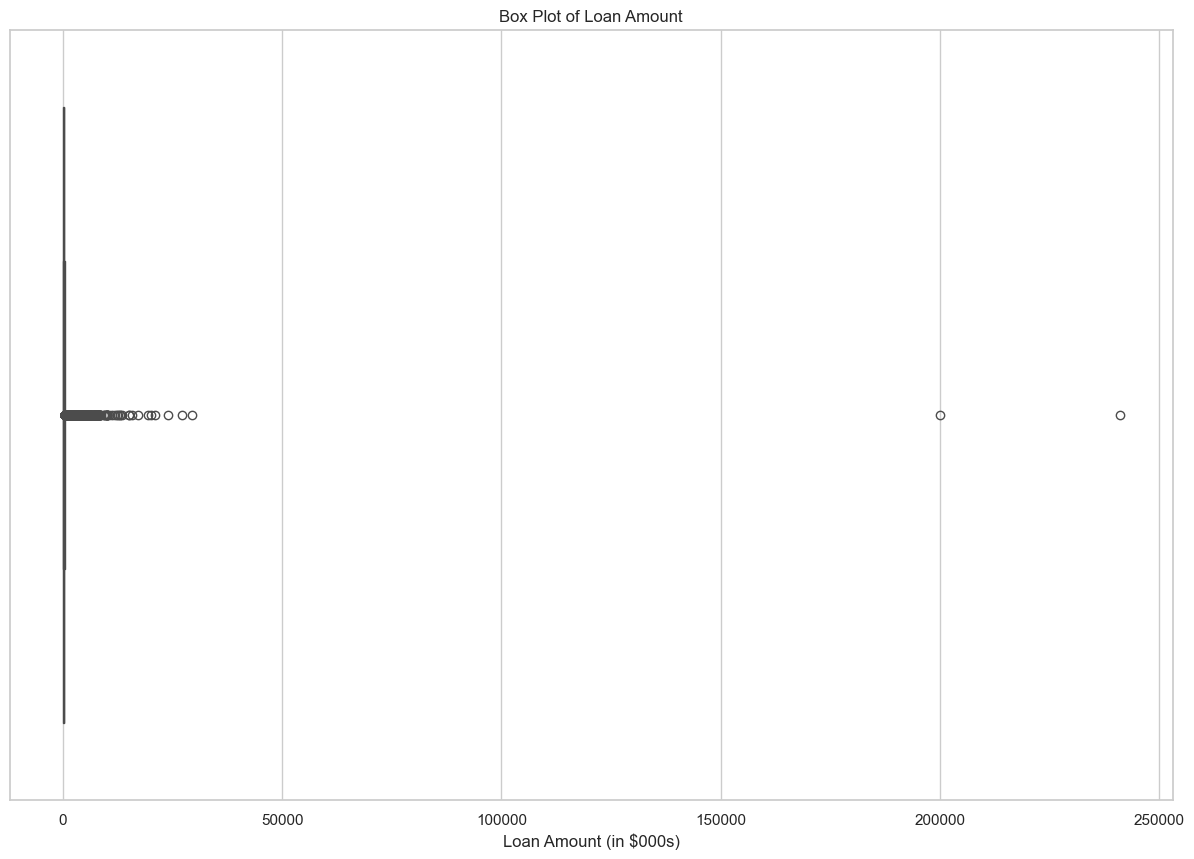

In [59]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for loan amount
plt.figure(figsize=(15,10))
sns.boxplot(x=df_fin['loan_amount_000s'])
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount (in $000s)')
plt.show()

In [60]:
df_X = df_fin.drop(df_fin[df_fin['loan_amount_000s'] > 2000].index)

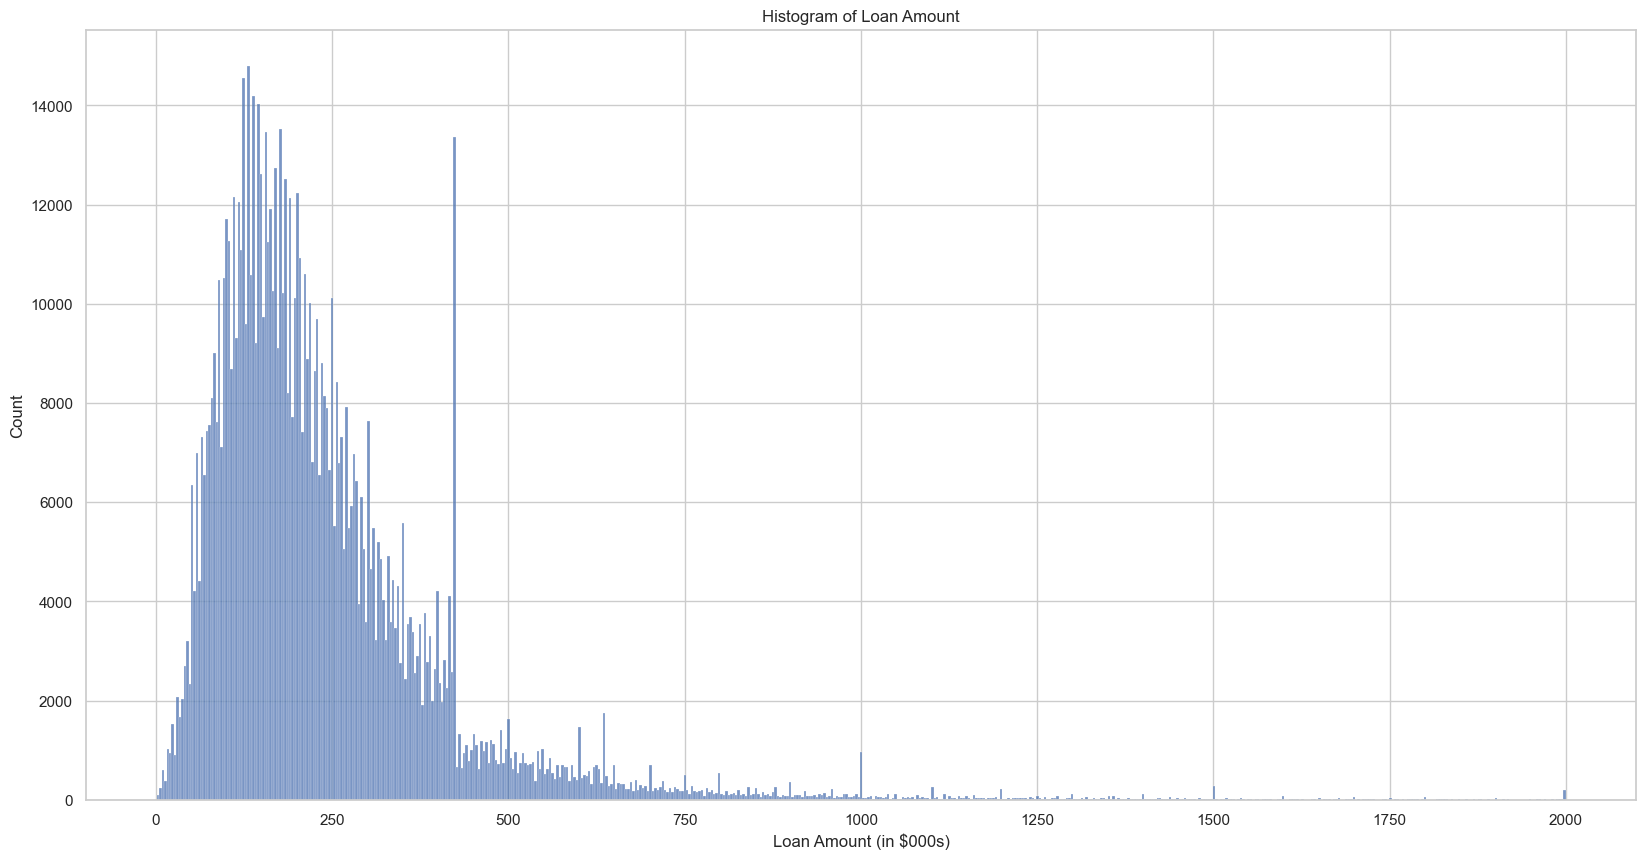

In [61]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for loan amount
plt.figure(figsize=(20,10))
sns.histplot(x=df_X['loan_amount_000s'])
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount (in $000s)')
plt.show()

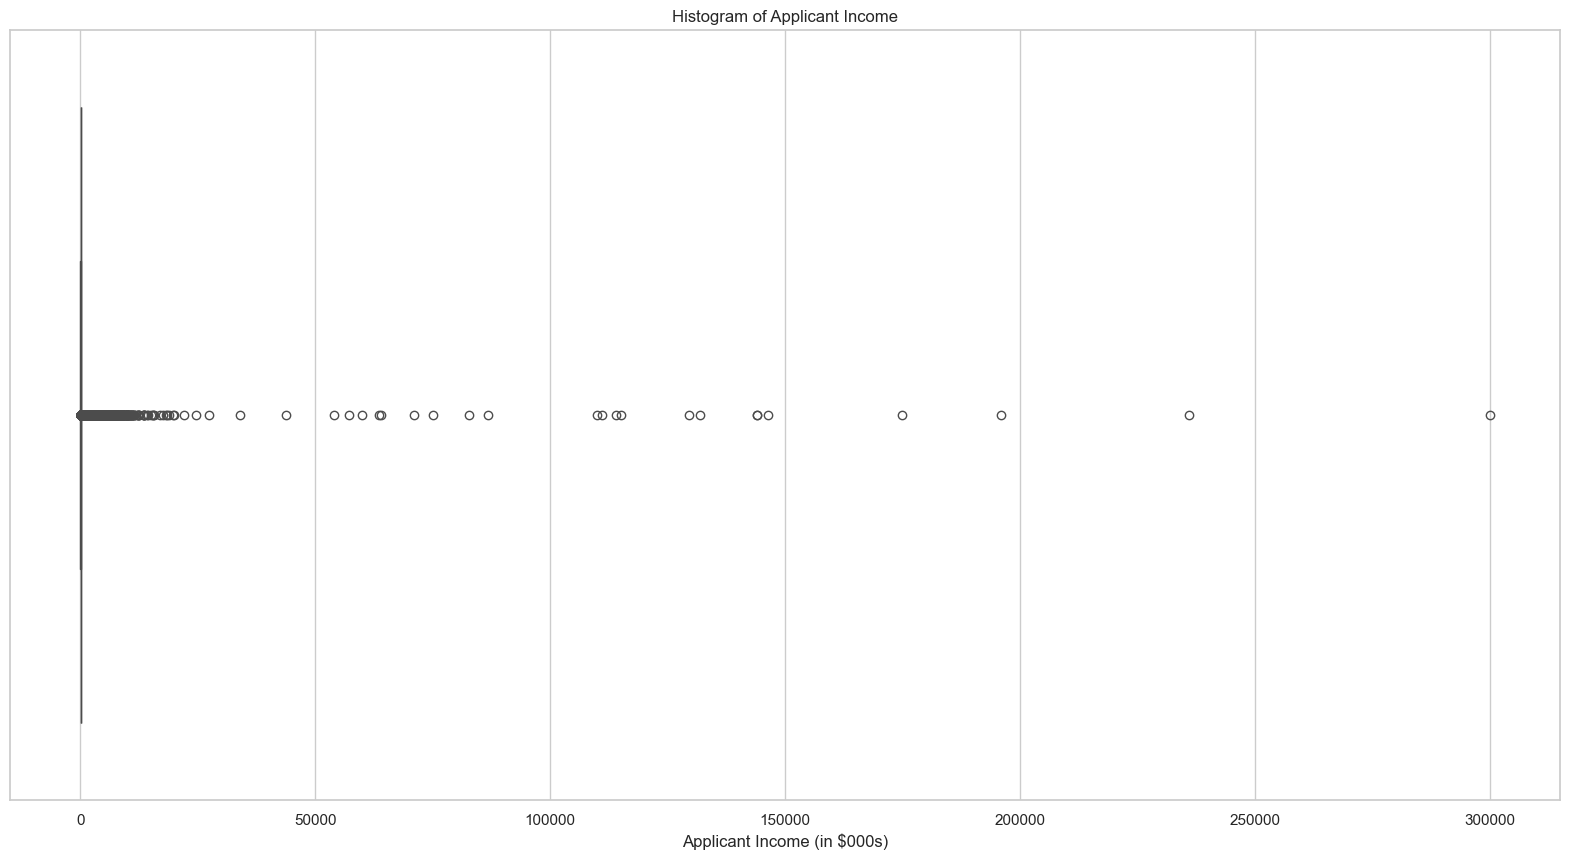

In [62]:
sns.set(style="whitegrid")

# Create a histogram for applicant income
plt.figure(figsize=(20,10))
sns.boxplot(x=df_X['applicant_income_000s'])
plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income (in $000s)')
plt.show()

In [63]:
df_X = df_fin.drop(df_fin[df_fin['applicant_income_000s'] > 100000].index)

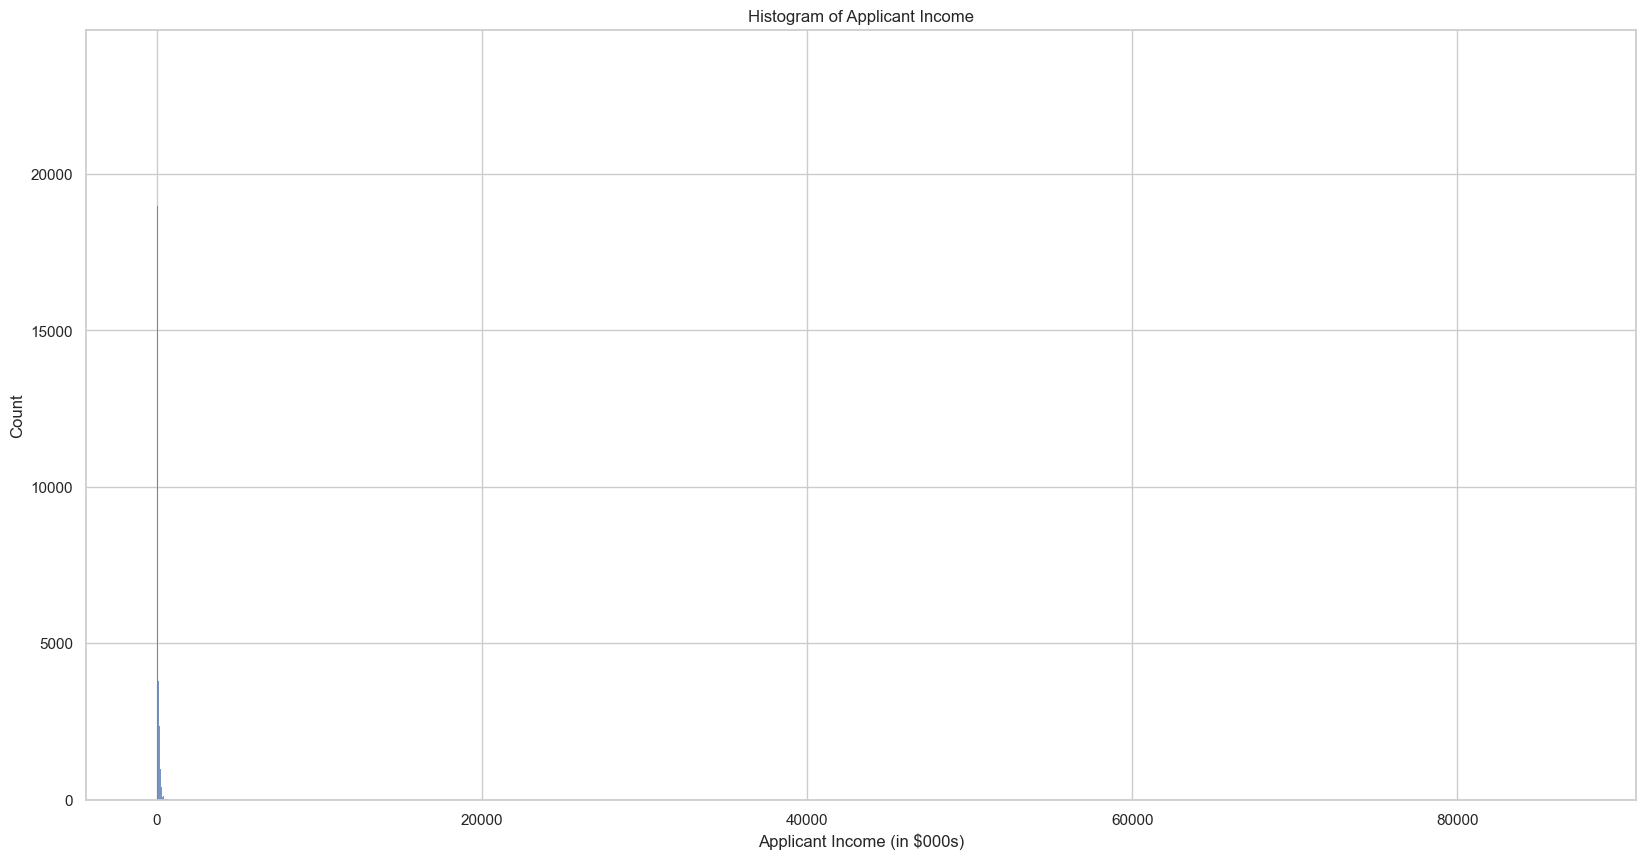

In [64]:
sns.set(style="whitegrid")

# Create a histogram for applicant income
plt.figure(figsize=(20,10))
sns.histplot(x=df_X['applicant_income_000s'])
plt.title('Histogram of Applicant Income')
plt.xlabel('Applicant Income (in $000s)')
plt.show()

## DATA UNDERSTANDING

C:\Users\pavan\AppData\Local\Temp\ipykernel_6448\3832765738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_X['loan_purpose_name'], palette ="magma")


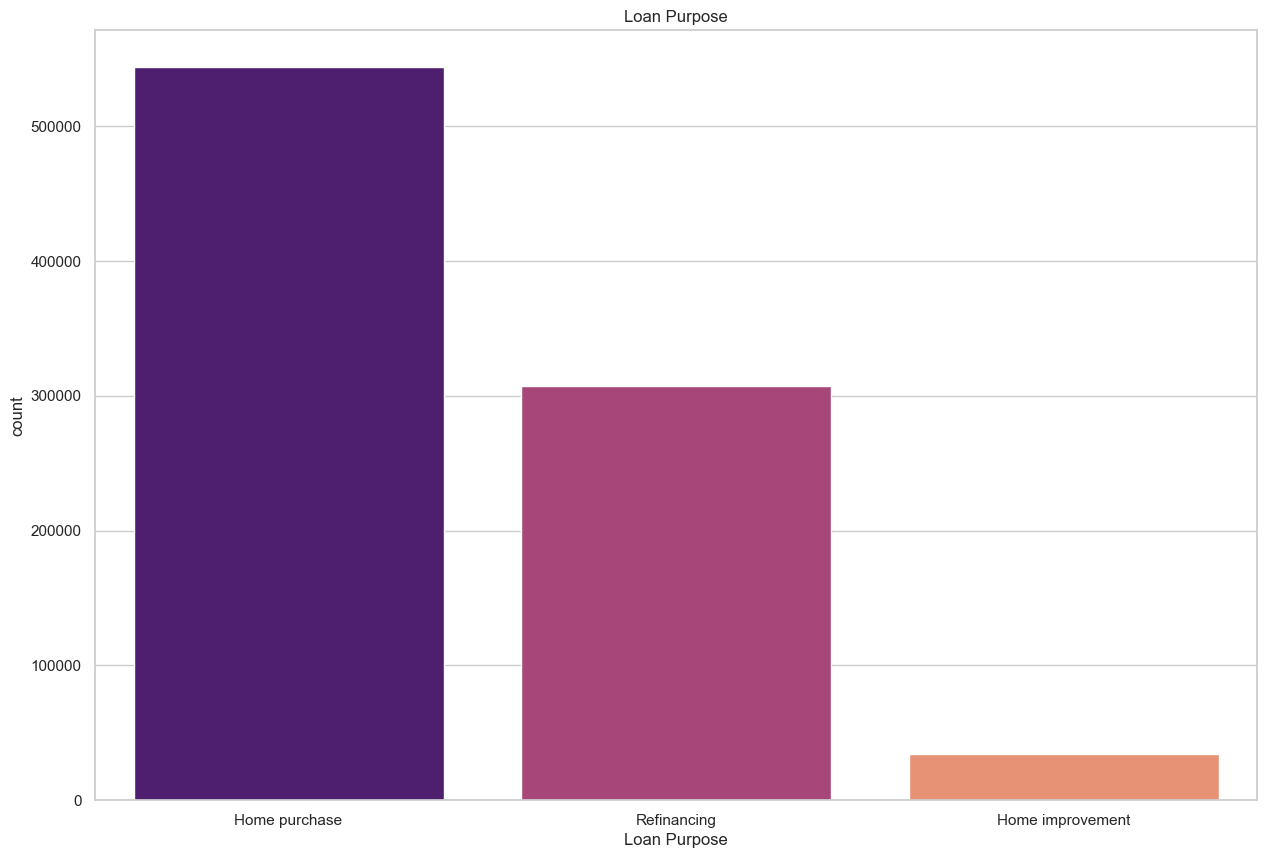

In [65]:
plt.figure(figsize = (15,10))
sns.countplot(x=df_X['loan_purpose_name'], palette ="magma")
plt.title('Loan Purpose')
plt.xlabel('Loan Purpose')
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_6448\3290714446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_X['applicant_ethnicity_name'], palette = "Set2")


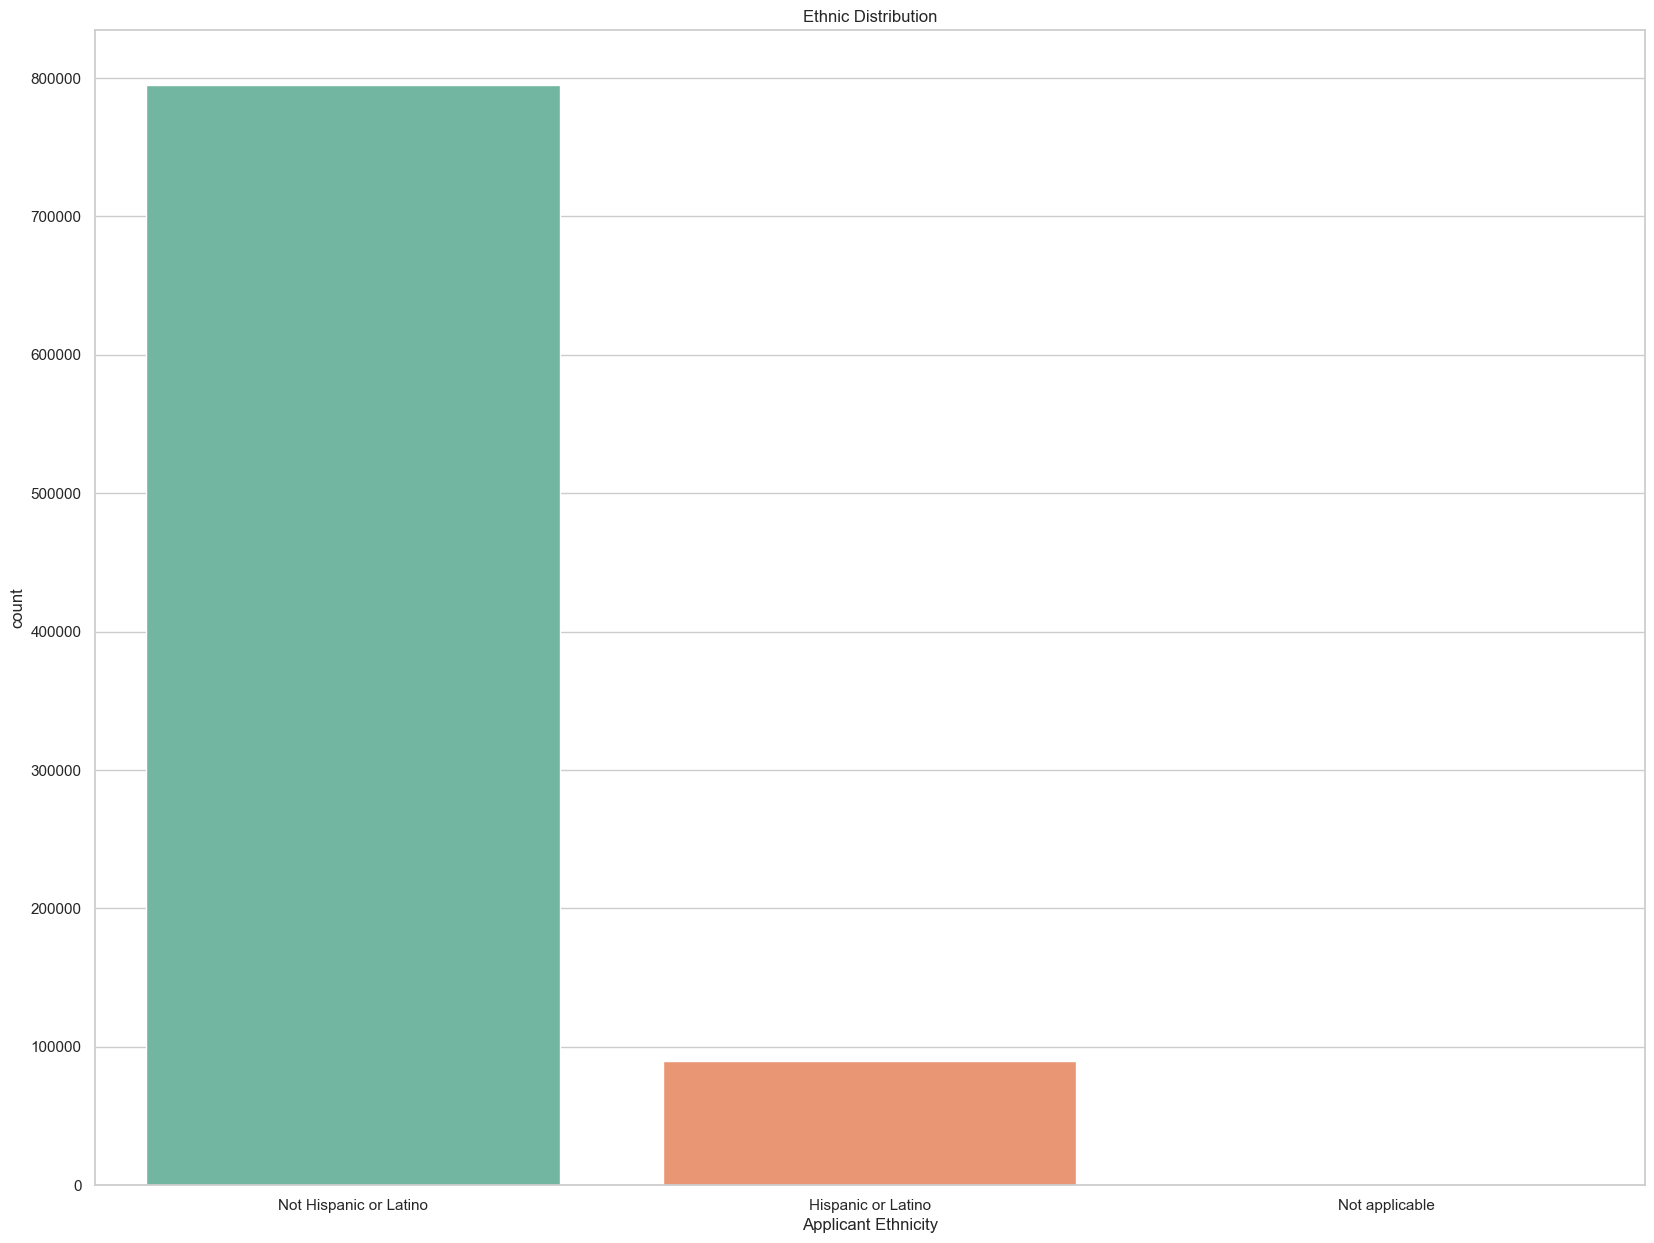

In [66]:
plt.figure(figsize=(20,15))
sns.countplot(x=df_X['applicant_ethnicity_name'], palette = "Set2")
plt.title('Ethnic Distribution')
plt.xlabel('Applicant Ethnicity')
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_6448\2891186068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_X['applicant_race_name_1'], palette = "Spectral")


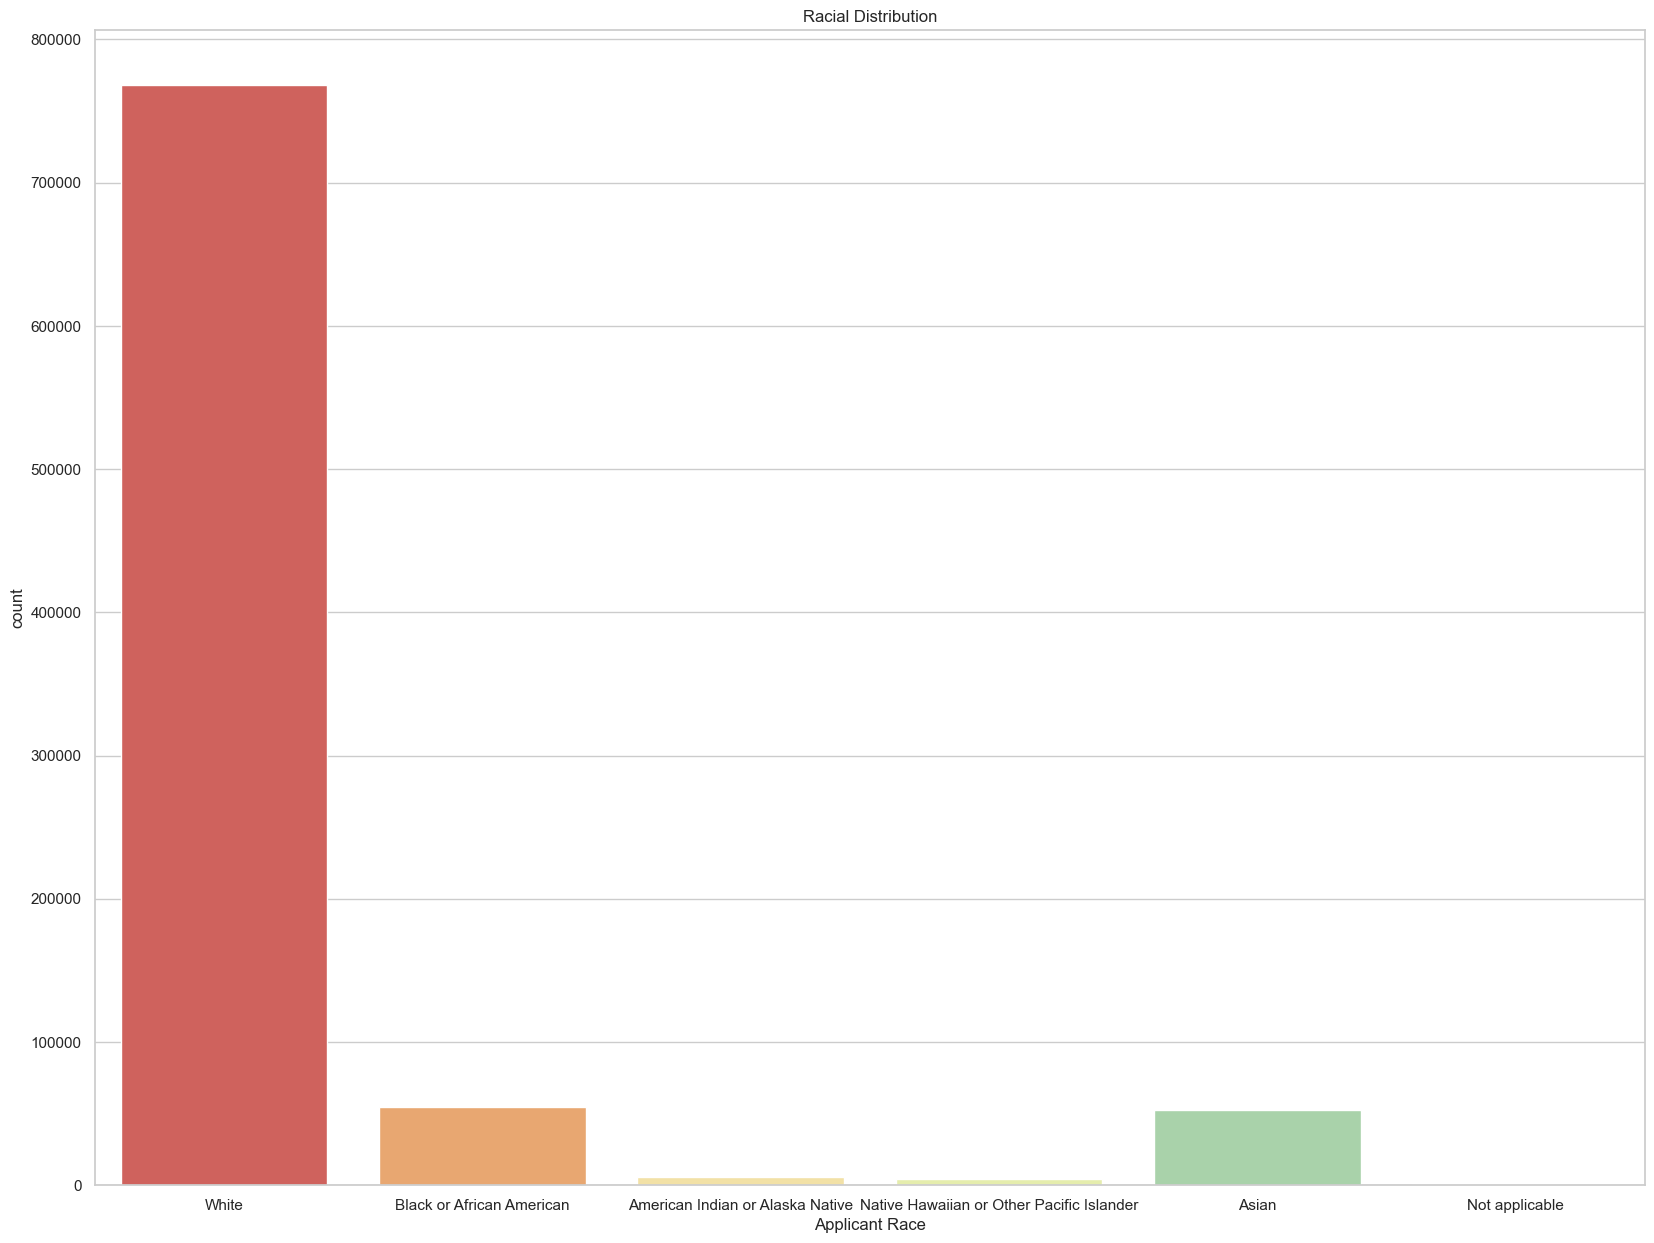

In [67]:
plt.figure(figsize=(20,15))
sns.countplot(x=df_X['applicant_race_name_1'], palette = "Spectral")
plt.title('Racial Distribution')
plt.xlabel('Applicant Race')
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_6448\4108972038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_X['applicant_sex_name'], palette ="rocket")


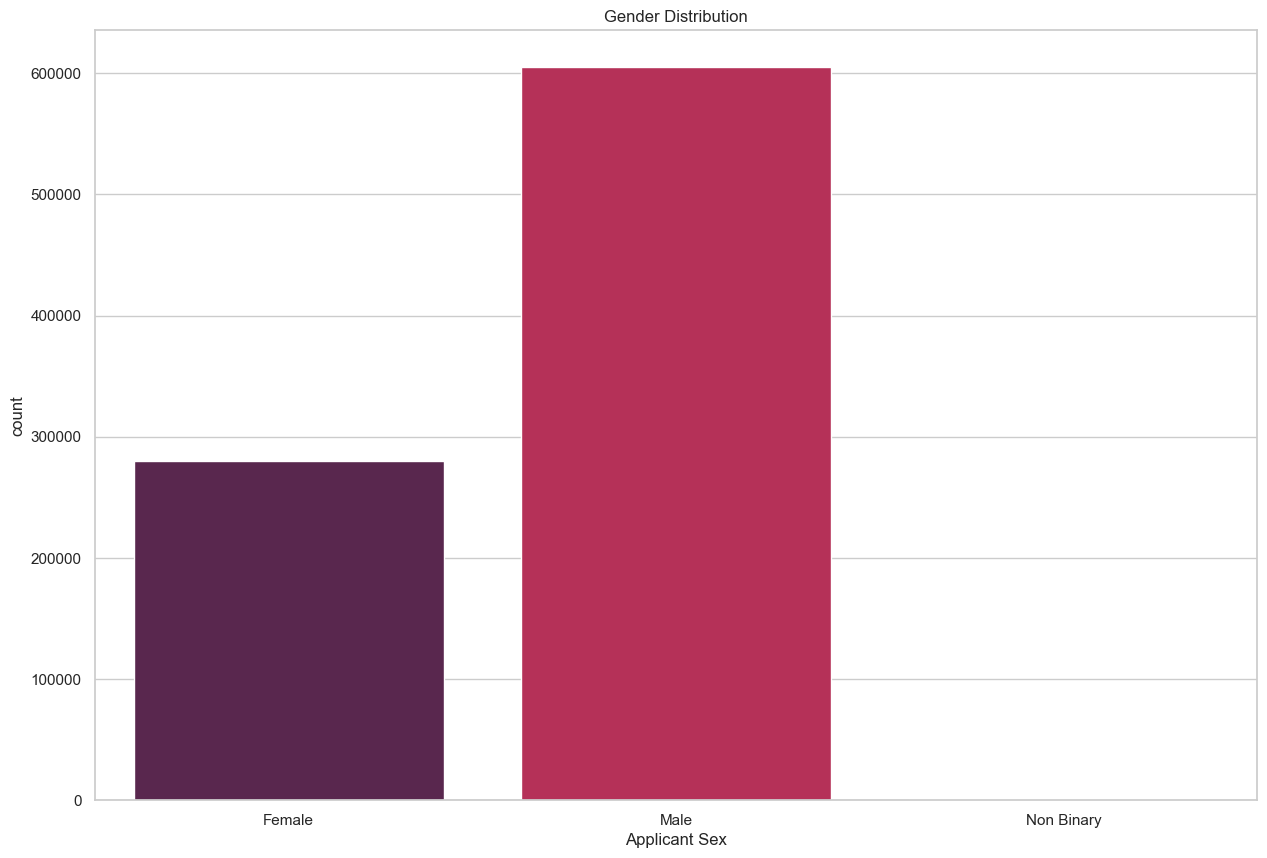

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(x=df_X['applicant_sex_name'], palette ="rocket")
plt.title('Gender Distribution')
plt.xlabel('Applicant Sex')
plt.show()

In [69]:
df_X.to_csv(r"C:\Users\pavan\OneDrive\Desktop\Home Loan Project\HMDA_Demographics_Clean_Dataset.csv", index = False)